In [1]:
## Inputs: We are given: widthX, widthY, gridRes, robotWidth and mazeSegments 

## Steps: 

# 1. Construct the 2D grid and get the x and y co-ordinates of all node numbers: 

# --- Construct Graph --- #
# 2. Loop through all nodes and check if visitable. Maintain an array of Booleans which indicates which nodes are visitable

# 3. Loop again through all visitable nodes: 

#  # 3.1: Get neighbors of current node: 
#  # 3.2: If neighbor node is visitable: Check if edge is possible: If yes then add edge to the list: 

# 4. Solve Graph to find shorest path using DijkstraL


# 5. Visualize Grid, Maze segments and shortest path:
# 1. Plot grid: 
# 2. Plot maze segments
# 3. Plot robot as a box: TO BE DONE!
# 4. Plot the shortest path



In [2]:
# Declare global variables: 
global X,Y
global widthX, widthY, gridRes, robotWidth
global mazeSegments


# Import libraries:
import numpy as np

## 1. Function to generate X-Y grid and return node numbers: 

In [3]:
# Parameters: 
# Width of Grid in X-direction : widthX
# Width of Grid in Y-direction : widthY
# Resolution of the grid: gridRes

widthX = 20
widthY = 20
gridRes = 1
robotWidth = 2.1


seg1 = [(7,0) ,(2.5,7.5)]
seg2 = [(5,20) ,(12.5,5)]
seg3 = [(20,10), (15,10)]

mazeSegments = [seg1, seg2, seg3]


# Description : This function returns two arrays: 
# 1. X_grid_re - Contains the X-cordinates of all the nodes: 
# 2. Y_grid_re - Contains the Y-cordinates of all the nodes: 
def generate_grid(widthX, widthY, gridRes): 
    # 1-D vector in X -direction: 
    x_array = np.arange(0,widthX + gridRes, gridRes)

    # 1-D vector in Y -direction: 
    y_array = np.arange(0,widthY + gridRes, gridRes)

    # Create the X-Y meshgrid: 
    X_grid, Y_grid = np.meshgrid(x_array, y_array)

    rows, cols = X_grid.shape

    # Reshape the grid arrays: 
    X_grid_re = np.reshape(X_grid, (rows*cols,-1))
    Y_grid_re = np.reshape(Y_grid, (rows*cols,-1))
    
    # Return the reshaped grids with X and Y co-ods: 
    return X_grid_re, Y_grid_re


# Returns X and Y co-ordinates of all the nodes:
[X,Y] = generate_grid(widthX,widthY,gridRes)

## 2. Function to return indices of adjacent Neighbors in a Planar Grid: 

In [44]:
# Description : This function returns two lists with the indices of the neighbors of the given node (index). 
# The first list dNeighbors contains all the diagonal neighbors, pNeighbors contains all perpendicular neighbors
def get_neighbor_indices(nodeIdx):
    
    global widthX, widthY, gridRes, X,Y
    
    
    # TO DO: Draw a diagram depicting the co-ordinate systems: 
    
    
    # First get X and Y co-ordinates from nodeIdx:
    nodeX = X[nodeIdx]
    nodeY = Y[nodeIdx]
    

    # Compute number of nodes in one row:
    idxWidth = int(widthX/gridRes) + 1
    
    
    ### a.Special Border cases: 
    
    # 1. Four Corners: 3 neighbors
    # 1.a Top left corner
    if nodeX ==0 and nodeY==0:        
        
        # Depict with diagram?
        pNeighbors = [nodeIdx +1, nodeIdx +idxWidth]
        dNeighbors = [nodeIdx+idxWidth+1]
        
        return pNeighbors , dNeighbors

    # 1.b Top right corner
    if nodeX == widthX and nodeY ==0:
        
        pNeighbors  = [nodeIdx -1 , nodeIdx + idxWidth]
        dNeighbors =  [nodeIdx + idxWidth -1]
        
        return pNeighbors , dNeighbors
    
    # 1.c Bottom right corner
    if nodeX ==widthX and nodeY == widthY:
        
        pNeighbors = [nodeIdx -1, nodeIdx - idxWidth]
        
        dNeighbors = [nodeIdx - idxWidth -1]
        
        return pNeighbors , dNeighbors
    
    # 1.d Bottom left corner
    if nodeX ==0 and nodeY == widthY:
        
        pNeighbors = [nodeIdx +1, nodeIdx - idxWidth]
        dNeighbors = [nodeIdx - idxWidth +1]
        
        return pNeighbors , dNeighbors
        
        
        
    # 2. Four edges: 5 neighbors
    # 2.a Top edge
    if nodeY ==0:     
        
        pNeighbors = [nodeIdx - 1, nodeIdx +1 , nodeIdx + idxWidth  ]
        dNeighbors = [nodeIdx + idxWidth -1 , nodeIdx + idxWidth +1]
        
        return pNeighbors , dNeighbors      
        
    
    # 2.b Right edge:
    if nodeX == widthX:
        
        
        pNeighbors = [ nodeIdx - idxWidth, nodeIdx -1, nodeIdx + idxWidth]
        dNeighbors = [nodeIdx - idxWidth -1 , nodeIdx + idxWidth -1]
        
        return pNeighbors , dNeighbors
    
    # 2.c Bottom edge:
    if nodeY == widthY:
        
        pNeighbors = [nodeIdx-1, nodeIdx+1,  nodeIdx - idxWidth] 
        dNeighbors = [nodeIdx -idxWidth -1, nodeIdx -idxWidth+1]
        
        return pNeighbors , dNeighbors
    
    # 2.d Left edge:
    if nodeX ==0:
        
        pNeighbors = [nodeIdx - idxWidth, nodeIdx +1 , nodeIdx +idxWidth ]
        dNeighbors = [nodeIdx -idxWidth +1 , nodeIdx +idxWidth+1]
        
        return pNeighbors , dNeighbors
    
    
    ### Normal Cases: Node is within the grid:
    
    pNeighbors = [nodeIdx -1, nodeIdx +1, nodeIdx - idxWidth  ,nodeIdx + idxWidth]
    
    dNeighbors = [ nodeIdx - idxWidth - 1, nodeIdx - idxWidth + 1 , nodeIdx + idxWidth - 1 , nodeIdx + idxWidth + 1]
    
    return pNeighbors , dNeighbors


# ## Test this out :
# pNeighbors , dNeighbors = get_neighbor_indices(100)


# print (pNeighbors)
# print (dNeighbors)
    
    

[99, 101, 79, 121]
[78, 80, 120, 122]


## 3. Function to determine orientation of a Triplet of points: 

In [45]:
## Description: This function takes as an input three points. Each point is a tuple with x and y co-ordinates: 
# It returns either: 
# 0: Co-linear points: 
# 1: Clockwise orientation
# 2: Counter-clockwise orientation: 

## Logic of the function: New approach: 

# 1. Consider the ray formed by the first two points. 
# 2. Determine whether the thrid point is to the right or left of the ray(This could also correspond to being up or down)
# 3. This can be done by computing the following determinant : SHOW THIS LATER
# 4. If the point is to the right, the triplet is CLOCKWISE!
#    If the point is to the left, the triplet is COUNTER-CLOCKWISE!

# Are there any border cases for this algorithm? 

def get_orientation(pa,pb,pc):
    
    # Compute the determinant: 
    det = (pb[0] - pa[0])*(pc[1] - pa[1]) -  (pc[0] - pa[0])*(pb[1] - pa[1])
    
    # Determine orientation:
    # Case : Point is to the right ->Triplet is clockwise:
    if det > 0:        
        return 1
    
    # Case : Point is to the left ->Triplet is counter-clockwise:
    elif det < 0: 
        
        return 2
    
    # Case: Points are collinear:
    else: 
        
        return 0
    

    
# ### Test this out: 
# pa = (3,4)
# pb = (4,2)
# pc = (3,2)


# orient = get_orientation(pa,pb,pc)

# if orient == 1: 
    
#     print (" Clockwise!")
    
# elif orient ==2: 
    
#     print (" Counter-Clockwise!")
    
# else: 
    
#     print (" Collinear!")
    
    
## Works for now:
    

 Counter-Clockwise!


## Function to check whether two segments intersect

In [46]:
### Description: We are given two segments: s1 and s2:  Each segment is two tuples in a list.Each tuple has two foats. 
#                The first two tuple is the co-ordinates of the start point and second is for the end point. 

# Example: s1 = [p1,q1]  --> p1=(xstart,ystart) , q1 = (xend,yend)\
#          s2 = [p2,q2]


## Logic used: Taken from Geek for Geeks website:https://www.geeksforgeeks.org/check-if-two-given-line-segments-intersect/

# Segements intersect if one of the following conditions is satisfied: 

# Condition # 1: (p1,q1,p2) & (p1,q1,q2) have different orientations and (p2,q2,p1) & (p2,q2,q1) have different orientations

# Condition # 2: All the four triplets are collinear

def checkIntersection(seg1, seg2): 
    
    # Determine the orientations of the different triplets: 
    
    # Triplet #1: (p1, q1, p2)
    p1q1p2 = get_orientation(seg1[0], seg1[1], seg2[0])
    
    # Triplet #1: (p1, q1, q2)
    p1q1q2 = get_orientation(seg1[0], seg1[1], seg2[1])
    
    # Triplet #3: (p2, q2, p1)
    p2q2p1 = get_orientation(seg2[0], seg2[1], seg1[0])
    
    # Triplet #4: (p2, q2, q1)
    p2q2q1 = get_orientation(seg2[0], seg2[1], seg1[1])
    
    # Check for the general case:Condition #1
    if p1q1p2 != p1q1q2 and p2q2p1 != p2q2q1:
        
        return True
    
    # Check for the special case: Condition #2: 
    if p1q1p2 == 0 and p1q1q2==0 and p2q2p1 ==0  and p2q2q1 ==0:
        
        #print ("Speical case reached!")
        
        return True
    
    # Otherwise they don't intersect:
    return False
    


    
### Be very careful with the testing for this: Its gonna be super useful everywhere: 
# p1 = (2,4)
# q1 = (4,2)

# seg1 = [p1,q1]

# p2 = (3,2)
# q2 = (6,5)

# seg2 = [p2,q2]

# Test for Intersection: 
# inter = checkIntersection(seg1, seg2)

# if inter: 
    
#     print (" Segements Intersect!")
    
# else: 
    
#     print (" Segments DO NOT Intersect!")
    
    

 Segments DO NOT Intersect!


## 5. Function to return the 4 end points and 4 segments of the robot given the node number:

In [48]:
### Description: Assume we are given the node(nodeIdx) at which the robot is. This is the x-y location at which the robot
#                center is. We add a bounding box around the center to account for the width of the robot and we output the
#                corners of the box (as points) and the edges of the box( as segments). 

def get_box(nodeIdx):
    
    global robotWidth, X,Y
    
    # First get the x-y co-ods of the current node: 
    nodeX = X[nodeIdx]
    nodeY = Y[nodeIdx]
    
    
    halfWidth = robotWidth/2
    
    # Now get the x-y co-ordinates of the four corners: As tuples:
    A = (nodeX - halfWidth , nodeY - halfWidth)
    
    B = (nodeX + halfWidth , nodeY - halfWidth)
    
    C = (nodeX + halfWidth , nodeY + halfWidth)
    
    D = (nodeX - halfWidth , nodeY + halfWidth)
    
    # Now create the four segments: 
    
    seg1 = [A,B]
    seg2 = [B,C]
    seg3 = [C,D]
    seg4 = [D,A]
    
    # How about store everything in two lists? 
    
    endPoints = [A,B,C,D]
    
    segments = [seg1, seg2, seg3, seg4]
    
    return endPoints, segments



### Test this out: 

# endPoints, segments = get_box(18)


# print (endPoints)

# seg1 = segments[3]
# seg2 = segments[1]

# inter = checkIntersection(seg1, seg2)

# if inter: 
    
#     print (" Segements Intersect!")
    
# else: 
    
#     print (" Segments DO NOT Intersect!")


[(array([ 16.5]), array([-1.5])), (array([ 19.5]), array([-1.5])), (array([ 19.5]), array([ 1.5])), (array([ 16.5]), array([ 1.5]))]


## Function to check whether a node is visitable: 

In [50]:
### Description: Given a node index(nodeIdx) and a list of the segments in the grid, determine whether the robot can be placed
#                at that node. 

# Logic: Create a box of the robot's width at the node. Check whether any of the segments in the list intersect with the 
#        box segments. 

def is_node_visitable(nodeIdx, mazeSegments): 
    
    # Get the segments of the box around the node: 
    endPoints , boxSegments = get_box(nodeIdx)
    
    # Loop through the maze segments:
    for mazeSeg in mazeSegments: 
        
        # Loop through the box segments:
        for boxSeg in boxSegments:
            
            
            # Check if box segment intersects with maze segment: 
            if checkIntersection(mazeSeg,boxSeg):                 
                return False
    
    
    # If none of the maze segments intersect with the box segments, then node is visitable: 
    return True


# ### Test this out: 
# nodeIdx = 31
# robotWidth = 3

# # seg1 = [(1,1), (1,4)]
# # seg2 = [(3.1,4) , (5,2)]
# # seg3 = [(3,6) ,(5,5)]

# # mazeSegments = [seg1, seg3]

# if is_node_visitable(nodeIdx, mazeSegments): 
    
#     print (" Yayy!!! Node is visitable!")
    
# else: 
    
#     print (" Sadly this node is NOT visitable!")   

            
            

 Yayy!!! Node is visitable!


## Function to check if an edge between two nodes is possible: 

In [51]:
### Description: Given the indices of two nodes check whether it is possible to have an edge between those two nodes. Return true if possible

# Logic: Construct a boxes around the two node centers corresponding to the robots width. Join the extreme points to get the
#        extreme segments. Check if the extreme segments intersect with any of the maze segments. 


def check_edge(nodeIdx1, nodeIdx2, mazeSegments): 
    
    # Template: 
    # if x1 > x2 and y1 > y2: bb, dd 
    # if x2 > x1 and y2 > y1: bb,dd
    # if x1> x2 and  y1< y2: aa,cc
    # if x2> x1 and  y2 < y1: aa,cc
    # if x1 == x2 or y1 ==y2: aa, bb
               
    global robotWidth, X, Y
    
    
    # Get the x and y co-ordinates of the nodes: 
    x1 = X[nodeIdx1]
    y1 = Y[nodeIdx1]
    
    x2 = X[nodeIdx2]
    y2 = Y[nodeIdx2]
    
    # Get boxes around the two nodes: 
    endPoints1 , segments1 = get_box(nodeIdx1)
    
    endPoints2 , segments2 = get_box(nodeIdx2)
    
    A1 = endPoints1[0]
    B1 = endPoints1[1]
    C1 = endPoints1[2]
    D1 = endPoints1[3]
    
    A2 = endPoints2[0]
    B2 = endPoints2[1]
    C2 = endPoints2[2]
    D2 = endPoints2[3]
    
    
    # Check the different conditions: 
    if (x1 > x2 and y1 > y2) or (x2 > x1 and y2 > y1): 
        
        seg1 = [A1,A2]
        seg2 = [C1,C2]
        extremeSegs = [seg1, seg2]
        
        
    elif (x1>x2 and y1 < y2) or (x2>x1 and y2<y1): 
        
        seg1 = [B1,B2]
        seg2 = [D1,D2]
        extremeSegs = [seg1, seg2]       

        
    elif x1 ==x2 or y1==y2: 
        
        seg1 = [A1,A2]
        seg2 = [B1,B2]
        extremeSegs = [seg1, seg2]
        
    
    # Loop through the maze segments:
    for mazeSeg in mazeSegments: 
        
        # Loop through extreme segements: 
        for exSeg in extremeSegs: 
            
            if checkIntersection(mazeSeg, exSeg): 
                
                return False
    
    
    # If there is no intersection, then return True since an edge is possible: 
    return True
    
# # Test : 
# nodeIdx1 = 16
# nodeIdx2 = 8

# # seg1 = [(2,1), (3,1)]
# # seg2 = [(1.4,2.5) , (3,3)]
# # seg3 = [(1.5,1.5) ,(3,1)]

# # mazeSegments = [seg1, seg2, seg3]

# if check_edge(nodeIdx1, nodeIdx2, mazeSegments): 
    
#     print (" Yayy! Edge is Possible!")
    
# else: 
    
#     print ("No edge for you today buddy!!!")


 Yayy! Edge is Possible!


## Class to construct the Graph: 

In [71]:
# Using an adjacency list representation of the Graph:

# Use the Linked List class in the file LLClass.py
from LLclass import LinkedList

class Graph: 
    
    # Constrcutor: 
    # Parameters: 
    # 1. numNodes - Number of nodes/vertices in the graph
    # 2. directed - Whether it is a Directed (True) or Undircted(False) graph
    # 3. adjLists - Adjacency lists of the graph. Each adjacency list is a linked list
    # 4. mazeSegments - The segments forming the maze walls
    def __init__(self, mazeSegments, numNodes = 0, directed = True): 
        
        self.numNodes = numNodes
        
        self.directed = directed
        
        self.adjLists = []
        
        self.visitable = []
        
        self.mazeSegments = mazeSegments
        
        # Create an array of linked lists: Size is equal to the number of nodes in the graph
        for nodeIdx in range(numNodes):
            
            self.adjLists.append(LinkedList())
            
            # If the node is visitable mark it as True:
            if is_node_visitable(nodeIdx,mazeSegments): 
                
                self.visitable.append(True)
            else: 
                self.visitable.append(False)  
                
                
                
    # Function to add an edge between two nodes: We are given the node indices: Zero indexed!
    def add_edge(self, node1, node2, weight=1): 
        
        if not self.directed: 
            
            self.adjLists[node2].insert_head(node1, weight)        
        
        self.adjLists[node1].insert_head(node2,weight)
        
        
    # Function to remove an edge from the graph: Given the indices of the nodes: 
    def remove_edge(self,node1,node2): 
        
        # Strategy : Remove the linked list node from the lists of both nodes (if undirected)        
        if not self.directed: 
            
            self.adjLists[node2].delete(node1)
        
        # If directed then only remove one:
        self.adjLists[node1].delete(node2)
        
        
    # Function to print the structure of the graph: 
    def print(self): 
        
        print (" The adjency list representation of the Graph is: ")
        
        for i in range(self.numNodes): 
            
            print (" Node #", i , end= " --- ")
            
            self.adjLists[i].print()
            
            print(" ")

          
    # Function to add all the edges in the Graph:     
    def add_all_edges(self): 

        # Loop through all visitable nodes: 
        for nodeIdx in range(self.numNodes): 

            # Only if the node is visitable: 
            if self.visitable[nodeIdx]: 

                # Get the neighbors of the current node: 
                pNeighbors ,dNeighbors = get_neighbor_indices(nodeIdx)
                
                # Loop through the perpendicular neighbors: 
                for neigh in pNeighbors: 
                    
                    # Check if the neighbor is visitable: 
                    if self.visitable[neigh] and check_edge(nodeIdx, neigh, self.mazeSegments): 
                        
                        # Add an edge: 
                        self.add_edge(nodeIdx, neigh, 1)   # Adding a weight of 1
                        
                # Loop through diagonal neighbors: 
                for neigh in dNeighbors: 
                    
                    # Check if the neighbor is visitable: 
                    if self.visitable[neigh] and check_edge(nodeIdx, neigh, self.mazeSegments): 
                        
                        # Add an edge: 
                        self.add_edge(nodeIdx, neigh, 1.414)   # Adding a weight of 1.414

            

## Solving the Graph:  Using Dijkstra Algorithm

In [72]:
##### Implement Dijkstra algorithm to find the shortest path
### Description: We are given the startIdx and goalIdx in the Graph. Return the shortest path as a list of indices from start to goal
from dHeap import dHeap
from dHeap import dHeapNode

def dijkstra_grid(Graph, startIdx, goalIdx): 
    
    ## Steps: 
    # 0. Initialize a list for the closed List:
    closed = []
    
    # 0.5: Initialize a boolean array to indicate which nodes have been visited: 
    visited = []
    
    for i in range(Graph.numNodes):         
        visited.append(False)
    
    # 1. Initialize the Min-Heap which will be used as the PQ: 
    PQ =dHeap(Graph.numNodes)
    
    # 2. Add the start node to the PQ:
    startNode = dHeapNode(startIdx,0,0) 
    
    PQ.insert(startNode)
    
    # Pop off:
    iterCount = 0
    popped = startNode
    
    # 3. As long as goalIdx is not popped from the PQ and if the PQ is not empty:
    while popped.vertex != goalIdx and (PQ.heapList or iterCount < 1):
        
        # Update the iteration counter:
        iterCount +=1
        
        # Now pop of the next minimum node in the PQ: 
        popped = PQ.extract_min()
        
        # Add the popped node to the closed list: 
        closed.append(popped)
        
        # Mark the node as visited: 
        visited[popped.vertex] = True
        
        # Iterate through the adjacency list of the popped vertex to get all visitable neighbors:
        cursor = Graph.adjLists[popped.vertex].head
        
        # Until we reach the end of the list:
        while cursor: 
            
            # Only if the neighbor has not been visited previously: 
            if not visited[cursor.vertex]:
            
                # Get the key (distance from start) of the neighbor node:
                newNode = dHeapNode(cursor.vertex , popped.key + cursor.weight, iterCount - 1)

                # Insert/update the new node in the Priority Queue:
                PQ.insert(newNode)
                
            
            # Move the cursor forward: 
            cursor = cursor.next
        
        
        
        #print (iterCount, "-->", popped.vertex)
    
    
    # If the PQ is empty then a Path is not feasible: 
    if not PQ.heapList and popped.vertex != goalIdx: 
        
        print (" Path not Possible!!! Sorry!!!")
        return []
        
    # Extract the shortest path by Back tracking:
    pathIndices = []    
    currNode = popped
    
    # Back tracking: 
    while currNode.vertex != startIdx: 
        
        pathIndices.append(currNode.vertex)
        
        currNode = closed[currNode.bestNeighbor]
     
    # Reverse the path: 
    truePathIndices = pathIndices[::-1]
    
    # Print the path co-ordinates:
#     for idx in truePathIndices: 
        
#         print( X[idx], ",", Y[idx])
        
    # Return the shortest path: 
    return truePathIndices
        
    

In [73]:
### Description: Function to get node index from (x,y) co-ordinates: 

def get_node_idx(x,y): 
    
    idxWidth = int(widthX/gridRes) + 1
    
    nodeIdx = int(y/gridRes)*idxWidth + int(x/gridRes)
    
    return nodeIdx

In [118]:
### Code to Run: 
# 1. Construct the Graph for Dijkstra Algorithm: 
# 2. Solve the Graph for the shortest path: 
import time

# --------- TIME THIS SECTION --------# 
start =time.time()

## 1. Create the Graph Object and initialize it:

numNodes = len(X)

TG = Graph(mazeSegments, numNodes)

TG.add_all_edges()

## 2. Solve the graph: 
## Test dijkstra: 
startIdx = get_node_idx(0,0)
goalIdx =  get_node_idx(20,20)
truePathIndices = dijkstra_grid(TG,startIdx,goalIdx)

end = time.time()

timeWithGraph = end - start

print (" Time taken to construct Graph and solve is: " , timeWithGraph ,  "secs")


 Time taken to construct Graph and solve is:  0.5154261589050293 secs


Text(0,0.5,'Grid Y axis  (meters)')

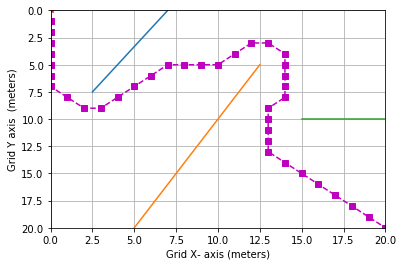

In [119]:
### Code to plot everything: 
# 1. The grid: 
# 2. The maze segments (Black solid lines)
# 3. The start (Red) and Goal (Green) nodes:
# 3. The shortest path (Purple line with markers)

from matplotlib import pyplot as plt
%matplotlib inline

# Start by plotting the maze segments: 
for mazeSeg in mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]])
    

# Plot the start and Goal nodes:
plt.plot(X[startIdx], Y[startIdx], 'r*')
plt.plot(X[goalIdx], Y[goalIdx], 'g*')

# Plot the shortest path:
plt.plot(X[truePathIndices], Y[truePathIndices], 'm--s')


# Set xLimit and yLimit: 
plt.xlim(0, widthX )
plt.ylim(0, widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')

#print(truePathIndices)


## Dijkstra Without a Graph: Strange eh?! Thanks Bijo:

In [75]:
### Description: Dijkstra algorithm on a grid without pre-computing all the edges on the graph. This saves time and space
#                if Dijkstra only needs to be run once and if the shortest path is unlikely to visit all areas of the grid: 
#                Use at your own discretion. 


def dijkstra_no_graph(startIdx, goalIdx, numNodes):
    
    global mazeSegments
    
    # Parameters: 
    # 1. Edge cost for perpendicular neighbors: 
    pCost = 1
    
    # 2. Edge cost for diagonal neighbors: 
    dCost = 1.414
    
    ## Steps: 
    # 0. Initialize a list for the closed List:
    closed = []
    
    # 0.5: Initialize a boolean array to indicate which nodes have been visited: 
    visited = []    
    for i in range(numNodes):         
        visited.append(False)
    
    
    # 1. Initialize the Min-Heap which will be used as the PQ: 
    PQ =dHeap(numNodes)
    
    # 2. Add the start node to the PQ:
    startNode = dHeapNode(startIdx,0,0) 
    
    PQ.insert(startNode)
    
    # Pop off:
    iterCount = 0
    popped = startNode
    
    # 3. As long as goalIdx is not popped from the PQ and if the PQ is not empty:
    while popped.vertex != goalIdx and (PQ.heapList or iterCount < 1):
        
        # Update the iteration counter:
        iterCount +=1
        
        # Now pop of the next minimum node in the PQ: 
        popped = PQ.extract_min()
        
        # Add the popped node to the closed list: 
        closed.append(popped)
        
        # Mark the node as visited: 
        visited[popped.vertex] = True
        
        # Extract and Iterate through the neighbors of the popped vertex:        
        pNeighbors , dNeighbors = get_neighbor_indices(popped.vertex)
        
        # 1. Perpendicular Neighbors:
        for p in pNeighbors:
            
            # Only 
            # 1. if the neighbor has not been visited previously: 
            # 2. The neighbor is visitable and 
            # 3. An edge between neighbor and popped node is possible:
            if not visited[p] and is_node_visitable(p, mazeSegments) and check_edge(popped.vertex,p,mazeSegments):
            
                # Get the key (distance from start) of the neighbor node and update the best neighbor in the closed list:
                newNode = dHeapNode(p , popped.key + pCost, iterCount - 1)

                # Insert/update the new node in the Priority Queue:
                PQ.insert(newNode)
        
        # 2. Diagonal Neighbors: 
        for d in dNeighbors: 
            
            # Only 
            # 1. if the neighbor has not been visited previously: 
            # 2. The neighbor is visitable and 
            # 3. An edge between neighbor and popped node is possible:
            if not visited[d] and is_node_visitable(d,mazeSegments) and check_edge(popped.vertex,d,mazeSegments):
            
                # Get the key (distance from start) of the neighbor node and update the best neighbor in the closed list:
                newNode = dHeapNode(d , popped.key + dCost, iterCount - 1)

                # Insert/update the new node in the Priority Queue:
                PQ.insert(newNode)   
    
    
    # If the PQ is empty then a Path is not feasible: 
    if not PQ.heapList and popped.vertex != goalIdx: 
        
        print (" Path not Possible!!! Sorry!!!")
        return []
        
    # Extract the shortest path by Back tracking:
    pathIndices = []    
    currNode = popped
    
    # Back tracking: 
    while currNode.vertex != startIdx: 
        
        pathIndices.append(currNode.vertex)
        
        currNode = closed[currNode.bestNeighbor]
     
    # Reverse the path: 
    truePathIndices = pathIndices[::-1]
    
    # Print the path co-ordinates:
#     for idx in truePathIndices: 
        
#         print( X[idx], ",", Y[idx])
        
    # Return the shortest path: 
    return truePathIndices
    
    


In [114]:
## Test dijkstra with out graph: 

start = time.time()
numNodes = len(X)
startIdx = get_node_idx(0,0)
goalIdx =  get_node_idx(20,20)
robotWidth = 2.1
noGraphPathIndices = dijkstra_no_graph(startIdx,goalIdx, numNodes)  


end = time.time()

timeNoGraph = end - start

print (" Time taken without the Graph is : " , timeNoGraph ,  "secs")

 Time taken without the Graph is :  0.607353687286377 secs


Text(0,0.5,'Grid Y axis  (meters)')

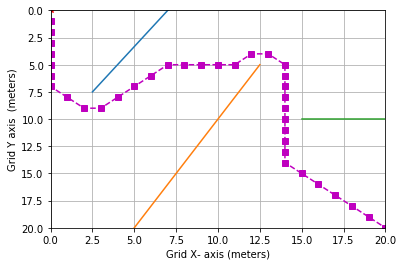

In [77]:
### Code to plot everything: 
# 1. The grid: 
# 2. The maze segments (Black solid lines)
# 3. The start (Red) and Goal (Green) nodes:
# 3. The shortest path (Purple line with markers)

from matplotlib import pyplot as plt

# Start by plotting the maze segments: 
for mazeSeg in mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]])
    

# Plot the start and Goal nodes:
plt.plot(X[startIdx], Y[startIdx], 'r*')
plt.plot(X[goalIdx], Y[goalIdx], 'g*')

# Plot the shortest path:
plt.plot(X[noGraphPathIndices], Y[noGraphPathIndices], 'm--s')


# Set xLimit and yLimit: 
plt.xlim(0, widthX )
plt.ylim(0, widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')

#print(noGraphPathIndices)

## A*-star algorithm for Shortest Path: No Graph: 

In [78]:
### Description: A* algorithm on a grid without pre-computing all the edges on the graph. This saves time and space
#                if A* only needs to be run once and if the shortest path is unlikely to visit all areas of the grid: 
#                Use at your own discretion. 


# Logic: A* differs from Dijkstra only in the sense that an additional heurestic is added to the key. 
# The heurestic used here is the Euclidean distance to the Goal Node: 

# First define the function to compute the heurestic: 
def euclidean_heurestic(currIdx, goalIdx): 
    
    # Extract the X and Y coods of the two nodes: 
    currX = X[currIdx] 
    currY = Y[currIdx]
    
    goalX = X[goalIdx]
    goalY = Y[goalIdx]
    
    return  np.sqrt((goalX - currX)**2 + (goalY - currY)**2)
    
def astar_no_graph(startIdx, goalIdx, numNodes, epsilon):
    
    global mazeSegments
    
    # Parameters: 
    # 1. Edge cost for perpendicular neighbors: 
    pCost = 1
    
    # 2. Edge cost for diagonal neighbors: 
    dCost = 1.414
    
    ## Steps: 
    # 0. Initialize a list for the closed List:
    closed = []
    
    # 0.5: Initialize a boolean array to indicate which nodes have been visited: 
    visited = []    
    for i in range(numNodes):         
        visited.append(False)
    
    
    # 1. Initialize the Min-Heap which will be used as the PQ: 
    PQ =dHeap(numNodes)
    
    # 2. Add the start node to the PQ:
    startNode = dHeapNode(startIdx,0,0) 
    
    PQ.insert(startNode)
    
    # Pop off:
    iterCount = 0
    popped = startNode
    
    # 3. As long as goalIdx is not popped from the PQ and if the PQ is not empty:
    while popped.vertex != goalIdx and (PQ.heapList or iterCount < 1):
        
        # Update the iteration counter:
        iterCount +=1
        
        # Now pop of the next minimum node in the PQ: 
        popped = PQ.extract_min()
        
        # Add the popped node to the closed list: 
        closed.append(popped)
        
        # Mark the node as visited: 
        visited[popped.vertex] = True
        
        # Extract and Iterate through the neighbors of the popped vertex:        
        pNeighbors , dNeighbors = get_neighbor_indices(popped.vertex)
        
        # 1. Perpendicular Neighbors:
        for p in pNeighbors:
            
            # Only 
            # 1. if the neighbor has not been visited previously: 
            # 2. The neighbor is visitable and 
            # 3. An edge between neighbor and popped node is possible:
            if not visited[p] and is_node_visitable(p, mazeSegments) and check_edge(popped.vertex,p,mazeSegments):
            
                # Get the key (distance from start) of the neighbor node and update the best neighbor in the closed list:
                newKey = popped.key + pCost + epsilon*euclidean_heurestic(p,goalIdx)
                newNode = dHeapNode(p , newKey, iterCount - 1)

                # Insert/update the new node in the Priority Queue:
                PQ.insert(newNode)
        
        # 2. Diagonal Neighbors: 
        for d in dNeighbors: 
            
            # Only 
            # 1. if the neighbor has not been visited previously: 
            # 2. The neighbor is visitable and 
            # 3. An edge between neighbor and popped node is possible:
            if not visited[d] and is_node_visitable(d,mazeSegments) and check_edge(popped.vertex,d,mazeSegments):
            
                # Get the key (distance from start) of the neighbor node and update the best neighbor in the closed list:
                newKey = popped.key + dCost + epsilon*euclidean_heurestic(p,goalIdx)
                newNode = dHeapNode(d , newKey, iterCount - 1)

                # Insert/update the new node in the Priority Queue:
                PQ.insert(newNode)     

    
    
    # If the PQ is empty then a Path is not feasible: 
    if not PQ.heapList and popped.vertex != goalIdx: 
        
        print (" Path not Possible!!! Sorry!!!")
        return []
        
    # Extract the shortest path by Back tracking:
    pathIndices = []    
    currNode = popped
    
    # Back tracking: 
    while currNode.vertex != startIdx: 
        
        pathIndices.append(currNode.vertex)
        
        currNode = closed[currNode.bestNeighbor]
     
    # Reverse the path: 
    aStarPathIndices = pathIndices[::-1]
    
    # Print the path co-ordinates:
#     for idx in truePathIndices: 
        
#         print( X[idx], ",", Y[idx])
        
    # Return the shortest path: 
    return aStarPathIndices

In [112]:
## Test A* with out graph: 
import time
start = time.time()
numNodes = len(X)
startIdx = get_node_idx(4,3)
goalIdx =  get_node_idx(20,20)
epsilon =10
robotWidth = 2

aStarPathIndices = astar_no_graph(startIdx,goalIdx, numNodes, epsilon)  


end = time.time()

timeNoGraph = end - start

print (" Time taken for A* without the Graph is : " , timeNoGraph ,  "secs")

 Path not Possible!!! Sorry!!!
 Time taken for A* without the Graph is :  0.08651852607727051 secs


Text(0,0.5,'Grid Y axis  (meters)')

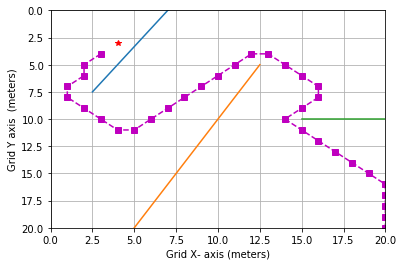

In [80]:
### Code to plot everything: 
# 1. The grid: 
# 2. The maze segments (Black solid lines)
# 3. The start (Red) and Goal (Green) nodes:
# 3. The shortest path (Purple line with markers)

from matplotlib import pyplot as plt

# Start by plotting the maze segments: 
for mazeSeg in params.mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]])
    

# Plot the start and Goal nodes:
plt.plot(X[startIdx], Y[startIdx], 'r*')
plt.plot(X[goalIdx], Y[goalIdx], 'g*')

# Plot the shortest path:
plt.plot(X[aStarPathIndices], Y[aStarPathIndices], 'm--s')


# Set xLimit and yLimit: 
plt.xlim(0, widthX )
plt.ylim(0, widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')

# print(aStarPathIndices)